In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

#### Data Preprocessing


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset directories
base_dir = "marine-animals-dataset_1/versions/1"  # Replace with your dataset path
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,          # Normalize pixel values (0-1 range)
    horizontal_flip=True,       # Augmentations
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)

valid_datagen = ImageDataGenerator(
    rescale=1.0/255.0           # Only normalize, no augmentation
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0           # Only normalize
)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),     # Resize images to 224x224
    batch_size=32,
    class_mode='categorical'    # Multi-class classification
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False               # Keep test data order for evaluation
)

# Print class indices
class_indices = train_generator.class_indices
print("Class indices:", class_indices)


Found 1241 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Class indices: {'Dolphin': 0, 'Fish': 1, 'Lobster': 2, 'Octopus': 3, 'Sea Horse': 4}


#### Feature Extraction (Using Pretrained Model)

In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
import numpy as np

# Load VGG16 model without the top layer (for feature extraction)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global average pooling layer to convert the 3D features into 1D
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Apply Global Average Pooling here
model = Model(inputs=base_model.input, outputs=x)

# Freeze the convolutional layers so that they don't get updated during training
for layer in base_model.layers:
    layer.trainable = False

# Extract features from the training, validation, and test sets
def extract_features(generator):
    features = []
    labels = []
    for _ in range(len(generator)):
        batch_x, batch_y = next(generator)  # Use next() to get the next batch
        batch_features = model.predict(batch_x)
        features.append(batch_features)
        labels.append(batch_y)
    return np.vstack(features), np.vstack(labels)

# Extract features from the generators
train_features, train_labels = extract_features(train_generator)
valid_features, valid_labels = extract_features(valid_generator)
test_features, test_labels = extract_features(test_generator)

# Print the shapes of the features
print(f"Train Features Shape: {train_features.shape}")
print(f"Validation Features Shape: {valid_features.shape}")
print(f"Test Features Shape: {test_features.shape}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 

#### Dimensionality Reduction

In [6]:
from sklearn.decomposition import PCA

# Use PCA for dimensionality reduction
pca = PCA(n_components=50)  # Reduce to 50 components
train_features_pca = pca.fit_transform(train_features)
valid_features_pca = pca.transform(valid_features)
test_features_pca = pca.transform(test_features)

# Check the shape after PCA reduction
print(f"Train Features (PCA) Shape: {train_features_pca.shape}")
print(f"Validation Features (PCA) Shape: {valid_features_pca.shape}")
print(f"Test Features (PCA) Shape: {test_features_pca.shape}")


Train Features (PCA) Shape: (1241, 50)
Validation Features (PCA) Shape: (250, 50)
Test Features (PCA) Shape: (100, 50)


#### Train the KNN Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')

# Train the KNN model
knn.fit(train_features_pca, np.argmax(train_labels, axis=1))

# Predict on the validation data
valid_pred = knn.predict(valid_features_pca)

# Evaluate the validation accuracy
valid_accuracy = accuracy_score(np.argmax(valid_labels, axis=1), valid_pred)
print(f"Validation Accuracy: {valid_accuracy}")

# Predict on the test data
test_pred = knn.predict(test_features_pca)

# Evaluate the test accuracy
test_accuracy = accuracy_score(np.argmax(test_labels, axis=1), test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Classification Report for test set
print(f"Classification Report for Test Set:\n{classification_report(np.argmax(test_labels, axis=1), test_pred)}")


Validation Accuracy: 0.592
Test Accuracy: 0.68
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.58      0.35      0.44        20
           2       0.69      0.90      0.78        20
           3       0.58      0.55      0.56        20
           4       0.68      0.65      0.67        20

    accuracy                           0.68       100
   macro avg       0.67      0.68      0.66       100
weighted avg       0.67      0.68      0.66       100



#### Tune KNN Hyperparameters 

In [8]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_features_pca, np.argmax(train_labels, axis=1))

# Best hyperparameters and model
print("Best Hyperparameters:", grid_search.best_params_)

# Test with the best model
best_knn = grid_search.best_estimator_

# Predict on the validation set using the tuned model
valid_pred_tuned = best_knn.predict(valid_features_pca)

# Evaluate the validation accuracy
valid_accuracy_tuned = accuracy_score(np.argmax(valid_labels, axis=1), valid_pred_tuned)
print(f"Tuned Validation Accuracy: {valid_accuracy_tuned}")

# Predict on the test data using the tuned model
test_pred_tuned = best_knn.predict(test_features_pca)

# Evaluate the test accuracy
test_accuracy_tuned = accuracy_score(np.argmax(test_labels, axis=1), test_pred_tuned)
print(f"Tuned Test Accuracy: {test_accuracy_tuned}")

# Classification Report for tuned model (on test set)
print(f"Tuned Classification Report for Test Set:\n{classification_report(np.argmax(test_labels, axis=1), test_pred_tuned)}")


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Tuned Validation Accuracy: 0.576
Tuned Test Accuracy: 0.72
Tuned Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.82      0.45      0.58        20
           2       0.70      0.80      0.74        20
           3       0.56      0.70      0.62        20
           4       0.82      0.70      0.76        20

    accuracy                           0.72       100
   macro avg       0.74      0.72      0.71       100
weighted avg       0.74      0.72      0.71       100



Tuned Confusion Matrix:
[[19  0  1  0  0]
 [ 1  9  2  6  2]
 [ 1  0 16  2  1]
 [ 2  1  3 14  0]
 [ 1  1  1  3 14]]


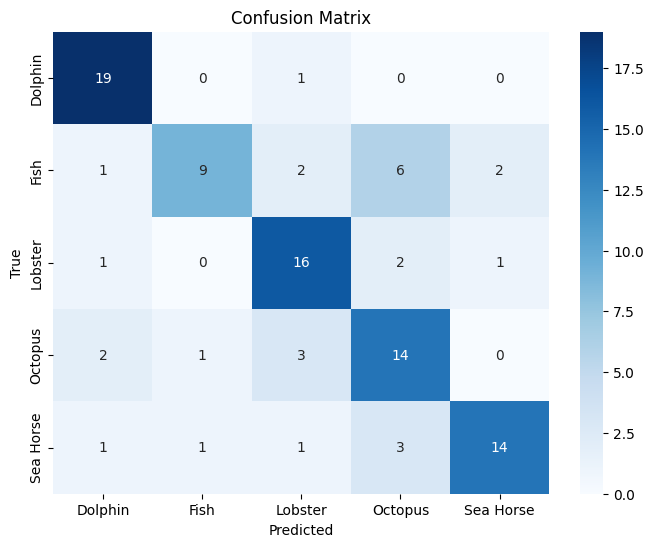

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for the tuned model
conf_matrix_tuned = confusion_matrix(np.argmax(test_labels, axis=1), test_pred_tuned)
print(f"Tuned Confusion Matrix:\n{conf_matrix_tuned}")

# Plot confusion matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report for validation set
print("Classification Report (Validation Set):")
print(classification_report(np.argmax(valid_labels, axis=1), valid_pred_tuned))

# Classification report for test set
print("Classification Report (Test Set):")
print(classification_report(np.argmax(test_labels, axis=1), test_pred_tuned))

# Confusion matrix for the test set
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), test_pred_tuned)
print("Confusion Matrix (Test Set):")
print(conf_matrix)


Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        50
           1       0.66      0.38      0.48        50
           2       0.50      0.64      0.56        50
           3       0.44      0.36      0.40        50
           4       0.57      0.56      0.57        50

    accuracy                           0.58       250
   macro avg       0.57      0.58      0.56       250
weighted avg       0.57      0.58      0.56       250

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.82      0.45      0.58        20
           2       0.70      0.80      0.74        20
           3       0.56      0.70      0.62        20
           4       0.82      0.70      0.76        20

    accuracy                           0.72       100
   macro avg       0.74      0.72      0.71       100
wei

#### PCA experiment

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
valid_features_scaled = scaler.transform(valid_features)
test_features_scaled = scaler.transform(test_features)


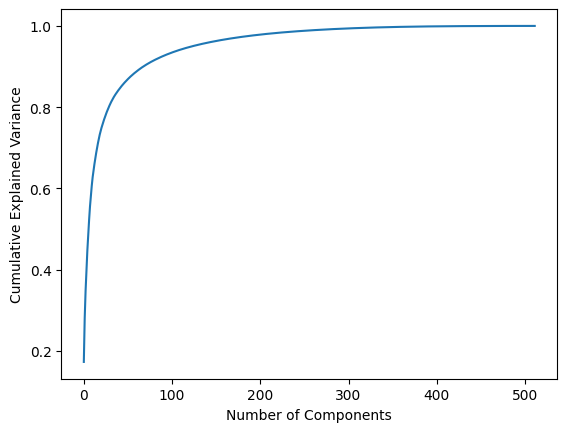

In [12]:
import matplotlib.pyplot as plt

pca = PCA().fit(train_features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

# Flatten features
train_features_flat = train_features.reshape(train_features.shape[0], -1)
valid_features_flat = valid_features.reshape(valid_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

# Normalize the data
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_flat)
valid_features_scaled = scaler.transform(valid_features_flat)
test_features_scaled = scaler.transform(test_features_flat)


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=250, random_state=42)
train_features_pca = pca.fit_transform(train_features_scaled)
valid_features_pca = pca.transform(valid_features_scaled)
test_features_pca = pca.transform(test_features_scaled)

# Print explained variance ratio
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained Variance by 250 components: {explained_variance:.2f}")


Explained Variance by 250 components: 0.94


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier()
knn.fit(train_features_pca, train_labels)

# Evaluate on validation and test sets
valid_pred = knn.predict(valid_features_pca)
test_pred = knn.predict(test_features_pca)

valid_accuracy = accuracy_score(valid_labels, valid_pred)
test_accuracy = accuracy_score(test_labels, test_pred)

print(f"Baseline Validation Accuracy: {valid_accuracy:.4f}")
print(f"Baseline Test Accuracy: {test_accuracy:.4f}")


Baseline Validation Accuracy: 0.5280
Baseline Test Accuracy: 0.6900


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(train_features_pca, train_labels)

# Best hyperparameters
best_knn = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [17]:
tuned_valid_pred = best_knn.predict(valid_features_pca)
tuned_test_pred = best_knn.predict(test_features_pca)

tuned_valid_accuracy = accuracy_score(valid_labels, tuned_valid_pred)
tuned_test_accuracy = accuracy_score(test_labels, tuned_test_pred)

print(f"Tuned Validation Accuracy: {tuned_valid_accuracy:.4f}")
print(f"Tuned Test Accuracy: {tuned_test_accuracy:.4f}")


Tuned Validation Accuracy: 0.5600
Tuned Test Accuracy: 0.7100


#### Further increase the varience

In [18]:
pca = PCA(n_components=350, random_state=42)
train_features_pca = pca.fit_transform(train_features)
valid_features_pca = pca.transform(valid_features)
test_features_pca = pca.transform(test_features)

explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained Variance by 350 Components: {explained_variance:.2f}")


Explained Variance by 350 Components: 1.00


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features_pca = scaler.fit_transform(train_features_pca)
valid_features_pca = scaler.transform(valid_features_pca)
test_features_pca = scaler.transform(test_features_pca)


In [20]:
from sklearn.manifold import TSNE

# Combine training, validation, and test features
all_features = np.vstack((train_features, valid_features, test_features))

# Fit t-SNE on all features
tsne = TSNE(n_components=2, random_state=42)
all_features_tsne = tsne.fit_transform(all_features)

# Split back into train, validation, and test
train_features_tsne = all_features_tsne[:len(train_features)]
valid_features_tsne = all_features_tsne[len(train_features):len(train_features) + len(valid_features)]
test_features_tsne = all_features_tsne[len(train_features) + len(valid_features):]


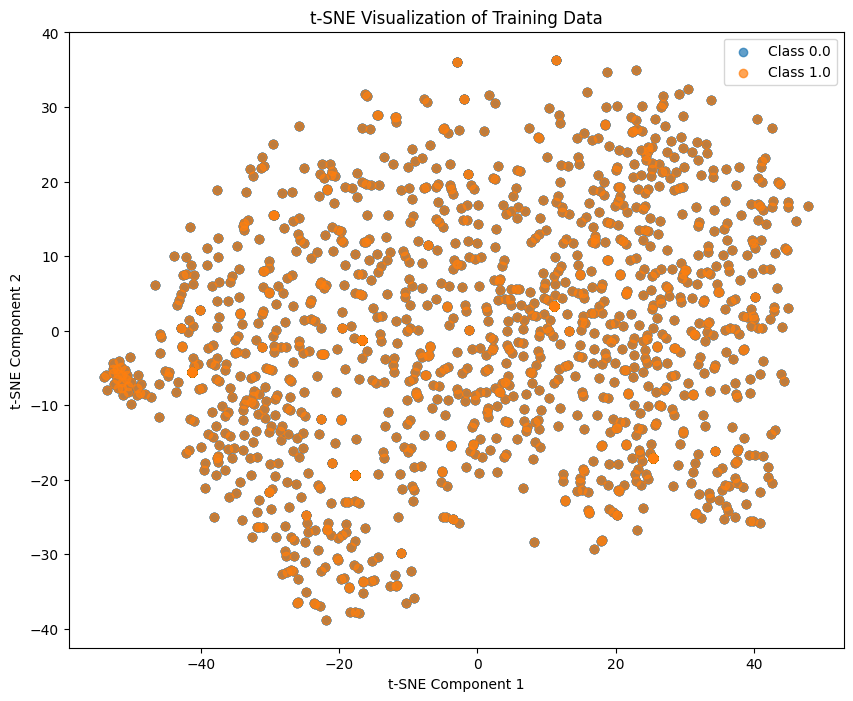

In [21]:
import matplotlib.pyplot as plt

# Assuming train_labels is available
plt.figure(figsize=(10, 8))
for label in np.unique(train_labels):
    indices = np.where(train_labels == label)
    plt.scatter(train_features_tsne[indices, 0], train_features_tsne[indices, 1], label=f"Class {label}", alpha=0.7)
plt.legend()
plt.title("t-SNE Visualization of Training Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')
knn.fit(train_features_tsne, train_labels)

# Predict and evaluate on validation data
valid_predictions = knn.predict(valid_features_tsne)
valid_accuracy = accuracy_score(valid_labels, valid_predictions)
print(f"Validation Accuracy: {valid_accuracy:.4f}")

# Predict and evaluate on test data
test_predictions = knn.predict(test_features_tsne)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")


Validation Accuracy: 0.5760
Test Accuracy: 0.6200


In [23]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_predictions, average='macro')
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")


Test Precision: 0.6525
Test Recall: 0.6200
Test F1-Score: 0.6244


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(train_features_tsne, train_labels)

# Evaluate the tuned model
best_knn = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Validation and test evaluation
valid_predictions_tuned = best_knn.predict(valid_features_tsne)
test_predictions_tuned = best_knn.predict(test_features_tsne)
print(f"Tuned Validation Accuracy: {accuracy_score(valid_labels, valid_predictions_tuned):.4f}")
print(f"Tuned Test Accuracy: {accuracy_score(test_labels, test_predictions_tuned):.4f}")


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Tuned Validation Accuracy: 0.5760
Tuned Test Accuracy: 0.6400
